In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
seed = 1336
np.random.seed(seed)

Using TensorFlow backend.


(60000, 28, 28)
(60000, 28, 28, 1)


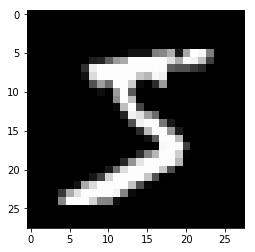

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

img = train_images[0]
plt.imshow(img, cmap='gray')

print(train_images.shape)

train_images = train_images.reshape(
    train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(
    test_images.shape[0], 28, 28, 1).astype('float32')

print(train_images.shape)

train_images = train_images / 255
test_imgaes = test_images / 255

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = test_labels.shape[1]

In [3]:
def baseline_Model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),
                     input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [4]:
my_Model = baseline_Model()
my_Model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)      

In [5]:
my_Model.fit(train_images, train_labels,
             validation_data=(test_images, test_labels),
             epochs=10,
             batch_size=100,
             verbose=1
             )

scores = my_Model.evaluate(train_images, train_labels, verbose=0)

print("CNN Error:", (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1905 - acc: 0.9436 - val_loss: 0.2849 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0593 - acc: 0.9818 - val_loss: 0.2445 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0423 - acc: 0.9870 - val_loss: 0.2457 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.2572 - val_acc: 0.9835
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.2350 - val_acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0204 - acc: 0.9931 - val_loss: 0.2508 - val_acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 17s 289us/st

(1, 28, 28, 1)


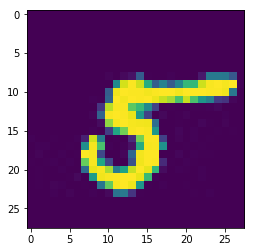

In [6]:
import numpy as np
from keras.preprocessing import image
img_Path = "5.jpg"
%matplotlib inline

img = image.load_img(img_Path, color_mode='grayscale', target_size=(28, 28))

plt.imshow(img)

img_Tensor = image.img_to_array(img)
img_Tensor = np.expand_dims(img_Tensor, axis=0)

img_Tensor /= 255

print(img_Tensor.shape)

In [7]:
from keras import models

layer_Outputs = [layer.output for layer in my_Model.layers[:8]]
activation = models.Model(inputs=my_Model.input, outputs=layer_Outputs)

In [8]:
activations = activation.predict(img_Tensor)

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 24, 24, 32)


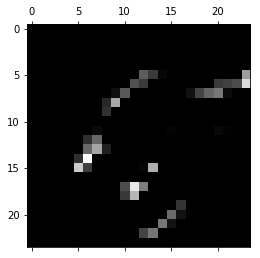

In [10]:
plt.matshow(first_layer_activation[0, :, :, 11], cmap='gray')
plt.show()

MemoryError: 

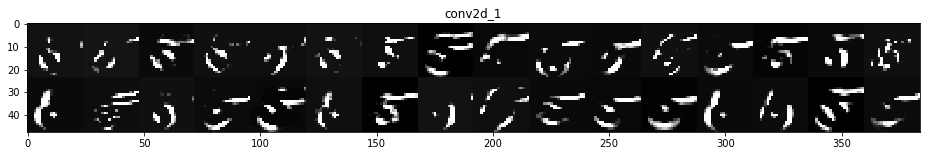

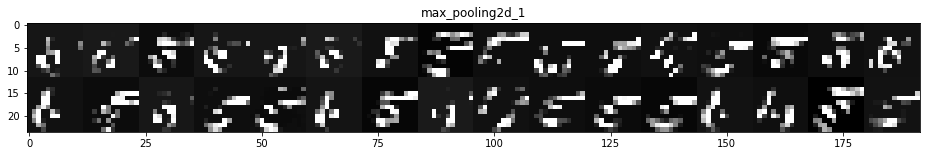

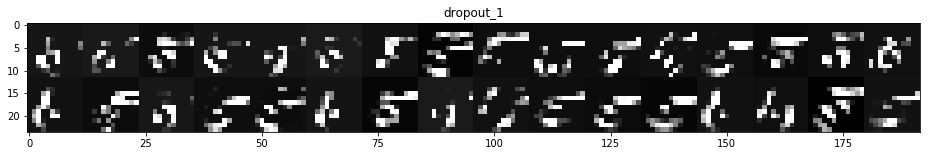

In [11]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in my_Model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

plt.show()